In [1]:
# from IPython.display import display
from IPython.core.interactiveshell import InteractiveShell
import numpy as np
import pandas as pd
import seaborn as sns

# general options
pd.options.display.float_format = '{:,.2f}'.format
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# let's load our dataset, the kaggle Titanic training set
titan = pd.read_csv('./data/titanic/train.csv')
titan.head(3)
titan.tail(4)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male 22.00      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female 38.00      1   
2                             Heikkinen, Miss. Laina  female 26.00      0   

   Parch            Ticket  Fare Cabin Embarked  
0      0         A/5 21171  7.25   NaN        S  
1      0          PC 17599 71.28   C85        C  
2      0  STON/O2. 3101282  7.92   NaN        S

PassengerId  Survived  Pclass                                      Name  \
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket  Fare Cabin Embarked  
887  female 19.00      0      0      112053 30.00   B42        S  
888  female   NaN      1      2  W./C. 6607 23.45   NaN        S  
889    male 26.00      0      0      111369 30.00  C148        C  
890    male 32.00      0      0      370376  7.75   NaN        Q

In [3]:
# let's review the data
titan.describe()

PassengerId  Survived  Pclass    Age  SibSp  Parch   Fare
count       891.00    891.00  891.00 714.00 891.00 891.00 891.00
mean        446.00      0.38    2.31  29.70   0.52   0.38  32.20
std         257.35      0.49    0.84  14.53   1.10   0.81  49.69
min           1.00      0.00    1.00   0.42   0.00   0.00   0.00
25%         223.50      0.00    2.00  20.12   0.00   0.00   7.91
50%         446.00      0.00    3.00  28.00   0.00   0.00  14.45
75%         668.50      1.00    3.00  38.00   1.00   0.00  31.00
max         891.00      1.00    3.00  80.00   8.00   6.00 512.33

Looking at the above you we know that in the training set:

  - there are 891 passengers
  - 38% of those survived the sinking of the Titanic
  - their ages ranged from 0.4 to 80
  - we are missing data in at least the 'Age' column

In [4]:
# let's get the pivot to work for the 'Sex' column
by_sex = pd.pivot_table(data=titan, index=['Sex'])
by_sex

Age  Fare  Parch  PassengerId  Pclass  SibSp  Survived
Sex                                                            
female 27.92 44.48   0.65       431.03    2.16   0.69      0.74
male   30.73 25.52   0.24       454.15    2.39   0.43      0.19

<AxesSubplot:xlabel='Sex'>

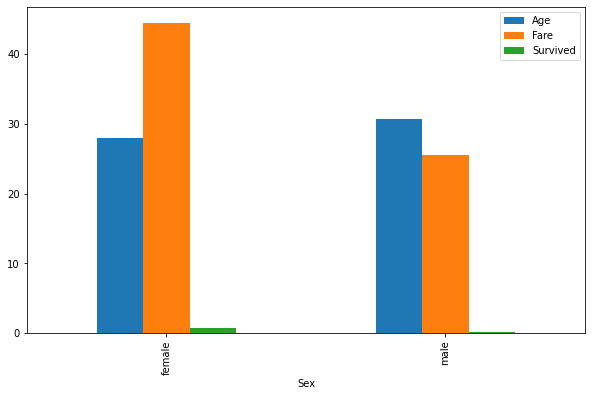

In [5]:
# pivot_table by default calculates the mean for each column, ignoring non-numeric columns
# let's plot a few of those means
by_sex[['Age', 'Fare', 'Survived']].plot.bar(figsize=(10,6))

In [6]:
# let's add another feature to the index
by_s_pcl = pd.pivot_table(data=titan, index=['Sex', 'Pclass'])
by_s_pcl
by_s_pcl_2 = titan.pivot_table(index=['Sex', 'Pclass'])
by_s_pcl_2

Age   Fare  Parch  PassengerId  SibSp  Survived
Sex    Pclass                                                  
female 1      34.61 106.13   0.46       469.21   0.55      0.97
       2      28.72  21.97   0.61       443.11   0.49      0.92
       3      21.75  16.12   0.80       399.73   0.90      0.50
male   1      41.28  67.23   0.28       455.73   0.31      0.37
       2      30.74  19.74   0.22       447.96   0.34      0.16
       3      26.51  12.66   0.22       455.52   0.50      0.14

Age   Fare  Parch  PassengerId  SibSp  Survived
Sex    Pclass                                                  
female 1      34.61 106.13   0.46       469.21   0.55      0.97
       2      28.72  21.97   0.61       443.11   0.49      0.92
       3      21.75  16.12   0.80       399.73   0.90      0.50
male   1      41.28  67.23   0.28       455.73   0.31      0.37
       2      30.74  19.74   0.22       447.96   0.34      0.16
       3      26.51  12.66   0.22       455.52   0.50      0.14

In [7]:
# let's organize that table a little differently
s_pcl_3 = pd.pivot_table(titan, index = 'Sex', columns = 'Pclass', values = ['Age', 'Fare', 'Survived'], aggfunc = 'mean')
s_pcl_3

Age               Fare             Survived          
Pclass     1     2     3      1     2     3        1    2    3
Sex                                                           
female 34.61 28.72 21.75 106.13 21.97 16.12     0.97 0.92 0.50
male   41.28 30.74 26.51  67.23 19.74 12.66     0.37 0.16 0.14

In [8]:
# what if we want different aggregates for different features
# no problem
s_pcl_4 = pd.pivot_table(titan, index = 'Sex', columns = 'Pclass', values = ['Age', 'Fare', 'Survived'], aggfunc = {'Age': np.mean, 'Fare': np.mean, 'Survived': np.sum})
display(s_pcl_4)

Age               Fare             Survived        
Pclass     1     2     3      1     2     3        1   2   3
Sex                                                         
female 34.61 28.72 21.75 106.13 21.97 16.12       91  70  72
male   41.28 30.74 26.51  67.23 19.74 12.66       45  17  47

In [9]:
titan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Ok, a fair number of "features", with Age, Cabin and Embarked missing data. Much as we discovered in the previous post looking at `groupby()`. Now since we will eventually be interested in predicting the probability of a passenger's survival, let's perhaps look at which of the above features might contribute to a higher (or lower) rate of survival.

Seems unlikely that PassengerId, Name, or Ticket are likely to correlate to survival in any way. I do expect that Sex, Age, Pclass likely have some correlation with survival. And, if travel class does, perhaps fare will also have some value as it would reflect the travel class as well as the passenger's status in general. The latter likely having some impact on accessability to the upper decks.

But what about Cabin and Embarked. Since they are missing data do we really need to deal with that issue.

Then there is the SibSp and Parch features.

Let's have a look. Starting with `Embarked` first.

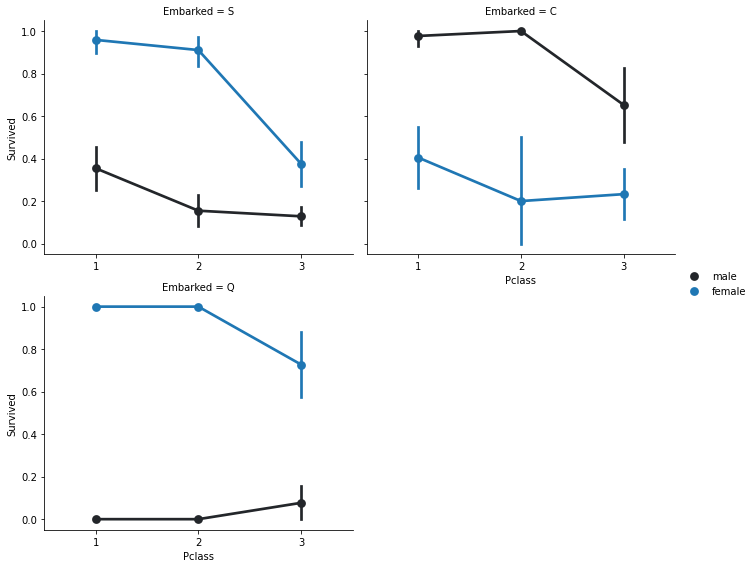

In [10]:
fgrid = sns.FacetGrid(titan, col='Embarked', col_wrap=2, height=4.0, aspect=1.2, sharex=False)
fgrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None, order=None, hue="Sex", hue_order=None)
fgrid.add_legend();

Would appear that `Embarked` is somewhat correlated with survival, depending on the passenger's sex. So we should likely keep this feature in our eventual model.

In [11]:
# let's looks at a similar pivot table
sp_e = pd.pivot_table(titan, index=['Pclass', 'Sex'], columns=['Embarked'], values=['Survived'], dropna=False, aggfunc='mean')
sp_e

Survived          
Embarked             C    Q    S
Pclass Sex                      
1      female     0.98 1.00 0.96
       male       0.40 0.00 0.35
2      female     1.00 1.00 0.91
       male       0.20 0.00 0.15
3      female     0.65 0.73 0.38
       male       0.23 0.08 0.13

In [12]:
# Trouble. The above values don't seem to match those of the Seaborn pointplot??
# Let's try groupby()
sp_e_gb = titan.groupby(["Sex", "Pclass", "Embarked"])["Survived"].mean().unstack()
sp_e_gb

Embarked         C    Q    S
Sex    Pclass               
female 1      0.98 1.00 0.96
       2      1.00 1.00 0.91
       3      0.65 0.73 0.38
male   1      0.40 0.00 0.35
       2      0.20 0.00 0.15
       3      0.23 0.08 0.13

In [13]:
titan.pivot_table('Survived', index=['Sex', 'Pclass'], columns=['Embarked'])

Embarked         C    Q    S
Sex    Pclass               
female 1      0.98 1.00 0.96
       2      1.00 1.00 0.91
       3      0.65 0.73 0.38
male   1      0.40 0.00 0.35
       2      0.20 0.00 0.15
       3      0.23 0.08 0.13

Not a clue what is going on. Will have to do some thinking and maybe some arithmetic.

In [14]:
#titan.pivot_table("Age", index=["Sex", "Survived", "Embarked"], columns = ["Pclass"], aggfunc='count')
sp_e_gb_2 = titan.groupby(["Sex", "Pclass", "Embarked", "Survived"])["Ticket"].count()
sp_e_gb_2

Sex     Pclass  Embarked  Survived
female  1       C         0             1
                          1            42
                Q         1             1
                S         0             2
                          1            46
        2       C         1             7
                Q         1             2
                S         0             6
                          1            61
        3       C         0             8
                          1            15
                Q         0             9
                          1            24
                S         0            55
                          1            33
male    1       C         0            25
                          1            17
                Q         0             1
                S         0            51
                          1            28
        2       C         0             8
                          1             2
                Q         0             1

In [15]:
sp_e_gb_2 = titan.loc[titan["Embarked"]=="C"].groupby(["Sex", "Pclass", "Survived"])["Ticket"].count()
sp_e_gb_3 = pd.pivot_table(titan.loc[titan["Embarked"]=="C"], index=['Pclass', 'Sex', 'Survived'], values=['Ticket'], aggfunc='count')
sp_e_gb_3

Ticket
Pclass Sex    Survived        
1      female 0              1
              1             42
       male   0             25
              1             17
2      female 1              7
       male   0              8
              1              2
3      female 0              8
              1             15
       male   0             33
              1             10

In [16]:
pd.crosstab(titan.loc[titan["Sex"]=="female"]['Survived'], titan['Embarked'], margins=True)
pd.crosstab(titan.loc[titan["Sex"]=="male"]['Survived'], titan['Embarked'], margins=True)

Embarked   C   Q    S  All
Survived                  
0          9   9   63   81
1         64  27  140  231
All       73  36  203  312

Embarked   C   Q    S  All
Survived                  
0         66  38  364  468
1         29   3   77  109
All       95  41  441  577

In [17]:
e_tst = titan.loc[(titan["Sex"]=="female") & (titan['Embarked']=='C')].groupby(["Pclass"])
print(e_tst["Survived"].mean())

Pclass
1   0.98
2   1.00
3   0.65
Name: Survived, dtype: float64


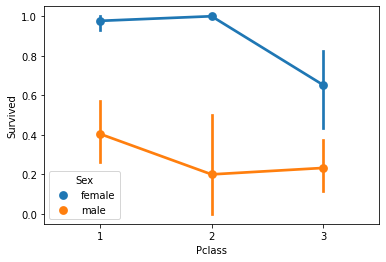

In [18]:
sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=titan.loc[titan["Embarked"]=="C"]);

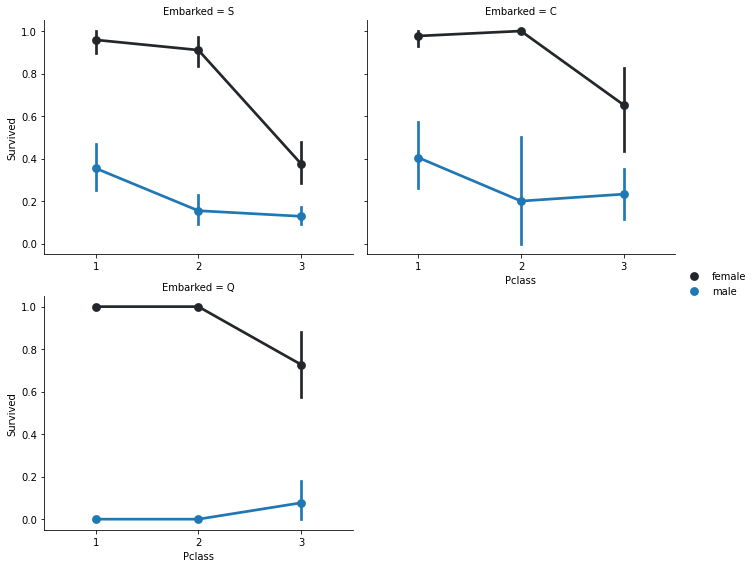

In [19]:
fgrid_2 = sns.FacetGrid(titan, col='Embarked', col_wrap=2, height=4.0, aspect=1.2, sharex=False)
# from the single chart above, clearly something not working correctly in the first set of plots
# let's specifically state the order for the sexes
fgrid_2.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None, order=None, hue="Sex", hue_order=["female", "male"] )
fgrid_2.add_legend();

Bingo. The chart above matches the pivot table data. Finally! Took me awhile to sort the possible cause. No easy search results. Took some reading and guessing.

Okay, now it looks like the port of embarcation is of less value in determining probability of survival. Likely can be dropped from the model.